<a href="https://colab.research.google.com/github/Manojgharge07/Machine_Learning_Data_Science/blob/main/Basic_Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [2]:
# SPLITTING THE DATASET
df = pd.read_csv('/content/drive/MyDrive/All CSV files/Wheat Seeds.csv')

In [3]:
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
x = df.drop('Class (1, 2, 3)', axis = 1)
y = df['Class (1, 2, 3)']

In [5]:
print('X shape=', x.shape)
print('y shape=', y.shape)

X shape= (210, 7)
y shape= (210,)


In [6]:
# copy the data
df_min_max_scaled = x.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled)


df2 = df_min_max_scaled

         Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0    0.440982   0.502066     0.570780          0.486486         0.486101   
1    0.405099   0.446281     0.662432          0.368806         0.501069   
2    0.349386   0.347107     0.879310          0.220721         0.503920   
3    0.306893   0.316116     0.793103          0.239302         0.533856   
4    0.524079   0.533058     0.864791          0.427365         0.664291   
..        ...        ...          ...               ...              ...   
205  0.151086   0.163223     0.637024          0.134009         0.250178   
206  0.060434   0.097107     0.390200          0.135698         0.117605   
207  0.246459   0.258264     0.727768          0.189752         0.429081   
208  0.118036   0.165289     0.399274          0.155405         0.146828   
209  0.161473   0.192149     0.547187          0.193694         0.245189   

     Asymmetry coefficient  Length of kernel groove  
0                 0.189302       

In [7]:
# Build Machine Learning Model
#Lets create feature matrix X  and y labels
x = df2
y = df['Class (1, 2, 3)']

In [8]:
print('X shape=', x.shape)
print('y shape=', y.shape)

X shape= (210, 7)
y shape= (210,)


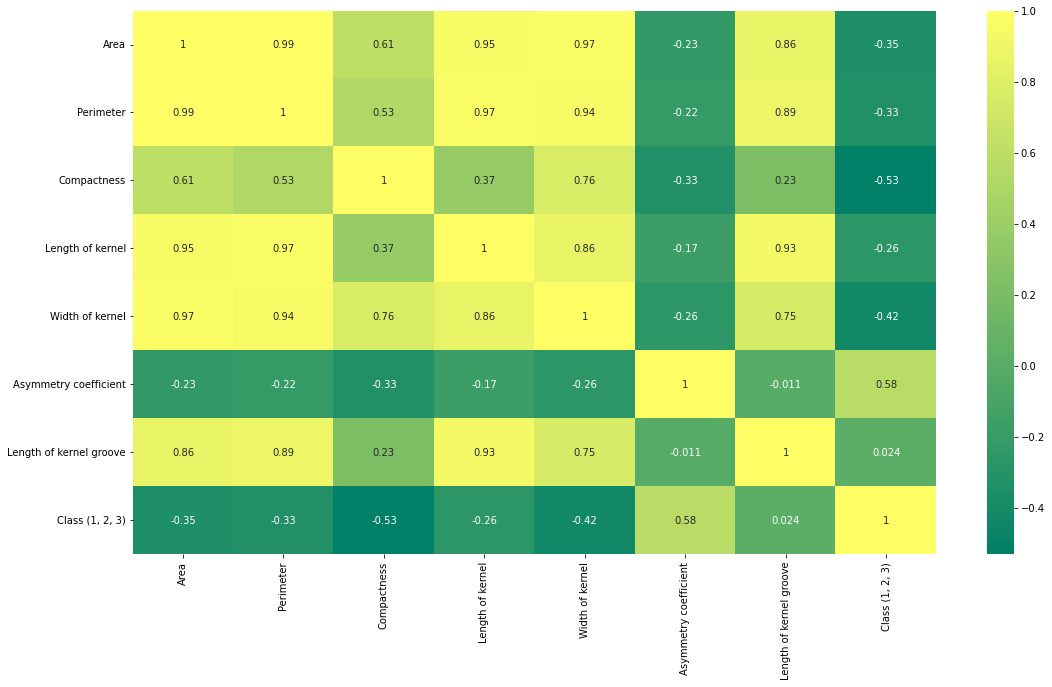

In [9]:
#corelation plot:
plt.figure(figsize = (18, 10))
corr = df.corr()
sns.heatmap(corr, cmap = 'summer', annot = True)

# Checking VIF values

In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#x = df[list(df.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_info['Column'] = x.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,810.877193,Area
1,804.654929,Perimeter
4,393.703028,Width of kernel
3,183.102864,Length of kernel
6,46.077798,Length of kernel groove
2,35.073601,Compactness
5,5.821741,Asymmetry coefficient


There is high VIF value of Area so we are drop this column.


In [11]:
x1 = x.drop(('Area'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif_info['Column'] = x1.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,464.760079,Perimeter
2,179.648474,Length of kernel
3,177.504469,Width of kernel
5,44.166370,Length of kernel groove
1,21.374009,Compactness
4,4.811310,Asymmetry coefficient


Again there is high VIF value of Perimeter so we are drop thos column.

In [12]:
x2 = x1.drop(('Perimeter'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif_info['Column'] = x2.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,64.254970,Length of kernel
2,50.683796,Width of kernel
4,42.363223,Length of kernel groove
0,18.729983,Compactness
3,4.794261,Asymmetry coefficient


There is high VIF value of Length of kernel so we are also drop thos column.

In [13]:
x3 = x2.drop(('Length of kernel'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif_info['Column'] = x3.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,32.095541,Width of kernel
0,16.755239,Compactness
3,15.490301,Length of kernel groove
2,4.760321,Asymmetry coefficient


In [28]:
x3.head()

,Compactness,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,0.570780,0.486101,0.189302,0.345150
1,0.662432,0.501069,0.032883,0.215165
2,0.879310,0.503920,0.251453,0.150665
3,0.793103,0.533856,0.194243,0.140817
4,0.864791,0.664291,0.076701,0.322994


In [43]:
from sklearn.model_selection import train_test_split
x3_train,x3_test, y_train, y_test = train_test_split(x3, y, test_size= 0.2, random_state= 1)
print('x_train dimension= ', x3_train.shape)
print('x_test dimension= ', x3_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

x_train dimension=  (168, 4)
x_test dimension=  (42, 4)
y_train dimension=  (168,)
y_train dimension=  (42,)


In [44]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#Creating the classifier object:
clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=5, min_samples_leaf=5)
clf_gini.fit(x3_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [45]:
x3_train

,Compactness,Width of kernel,Asymmetry coefficient,Length of kernel groove
106,0.884755,0.838204,0.270176,0.827671
151,0.152450,0.104063,0.809645,0.369769
94,0.336661,0.609408,0.541926,0.949778
84,0.634301,0.834640,0.285649,0.820286
193,0.158802,0.000000,0.531524,0.280650
...,...,...,...,...
203,0.719601,0.328582,1.000000,0.236829
137,0.404719,0.428368,0.243782,0.669621
72,0.618875,0.687099,0.490697,0.626292
140,0.362069,0.259444,0.590165,0.431315


In [46]:
df['Class (1, 2, 3)'].value_counts()

1    70
2    70
3    70
Name: Class (1, 2, 3), dtype: int64

In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#Creating the classifier object:
clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=5, min_samples_leaf=5)
clf_gini.fit(x3_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [36]:
#y_pred = clf_gini.predict(x3_train)
#y_pred1 = clf_gini.predict(x3_test)

In [49]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x3_train, y_train)
y_pred_train = regressor.predict(x3_train)

In [50]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

[[50  0  0]
 [ 0 61  0]
 [ 0  0 57]]


In [51]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_test = regressor.predict(x3_test)

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[20  0  0]
 [ 0  9  0]
 [ 0  0 13]]


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print ("Accuracy : ",accuracy_score(y_test,y_pred_test)*100)
	
print("Report : ",classification_report(y_test, y_pred_test))

Accuracy :  100.0
Report :                precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [54]:
from sklearn.metrics import accuracy_score
#Calculate accuracy_score for test:
accuracy_score(y_test, y_pred_test)

1.0

# Average voting

In [57]:
y_pred = clf_gini.predict(x3_test)
y_pred

array([1, 3, 3, 3, 1, 2, 1, 3, 3, 3, 2, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       2, 3, 1, 3, 1, 3, 3, 2, 2, 2, 2, 1, 3, 2, 3, 2, 3, 3, 3, 3])

In [58]:
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Accuracy :  85.71428571428571


# Simple Ensemble Techniques

In this section, we will look at a few simple but powerful techniques, namely:

1 Max Voting

2 Averaging

3 Weighted Averaging

**1 Max Voting**

In [59]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr',model1), ('dt', model2)], voting='hard')
model.fit(x3_train,y_train)
Md = model.score(x3_test,y_test)
print('The Model Score is :',Md)

The Model Score is : 0.9523809523809523


**2 Averaging**

In [60]:
from sklearn.neighbors import KNeighborsClassifier
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

model1.fit(x3_train,y_train)
model2.fit(x3_train,y_train)
model3.fit(x3_train,y_train)

pred1 = model1.predict_proba(x3_test)
pred2 = model2.predict_proba(x3_test)
pred3 = model3.predict_proba(x3_test)

finalpred = (pred1 + pred2 + pred3)/3
print('The Finalpred is :\n',finalpred)

The Finalpred is :
 [[0.73846998 0.22691687 0.03461315]
 [0.01878502 0.00709616 0.97411882]
 [0.66120428 0.11192412 0.2268716 ]
 [0.1088701  0.01800037 0.87312953]
 [0.71371613 0.26599778 0.02028609]
 [0.00642983 0.992432   0.00113818]
 [0.89457336 0.028941   0.07648563]
 [0.07117767 0.02243875 0.90638357]
 [0.76330262 0.01719149 0.21950589]
 [0.03250699 0.00563284 0.96186017]
 [0.04974106 0.91728682 0.03297212]
 [0.91500299 0.07329852 0.01169849]
 [0.87387284 0.07758998 0.04853718]
 [0.96656447 0.01995467 0.01348086]
 [0.8182492  0.00501945 0.17673135]
 [0.01439073 0.005236   0.98037326]
 [0.01378723 0.0035872  0.98262557]
 [0.87002378 0.03810912 0.09186709]
 [0.8443252  0.0878534  0.06782139]
 [0.86566015 0.08823013 0.04610971]
 [0.89299458 0.07580585 0.03119957]
 [0.83872256 0.08770071 0.07357673]
 [0.04898772 0.93270143 0.01831085]
 [0.03001472 0.00350739 0.9664779 ]
 [0.87862746 0.04892131 0.07245122]
 [0.04083234 0.01966701 0.93950066]
 [0.9185583  0.02928437 0.05215733]
 [0.0101

In [61]:
models = [('Decision Tree', DecisionTreeClassifier()),
         ('KNN', KNeighborsClassifier()),
         ('Naive Bayes', GaussianNB())]
for name, model in models:
    model.fit(x3_train, y_train)
    
    prediction = model.predict(x3_test)
    score = accuracy_score(y_test, prediction)
    print('{} Model Accuracy: {}'.format(name,score))

Decision Tree Model Accuracy: 0.8809523809523809
KNN Model Accuracy: 0.9761904761904762
Naive Bayes Model Accuracy: 0.9285714285714286


In [62]:
ensemble = VotingClassifier(estimators=models)
ensemble.fit(x3_train, y_train)
prediction = ensemble.predict(x3_test)
score = accuracy_score(y_test, prediction)
print('Ensemble Model Accuracy: {}'.format(score))

Ensemble Model Accuracy: 0.9285714285714286


**3 Weighted Average**

In [63]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

model1.fit(x3_train,y_train)
model2.fit(x3_train,y_train)
model3.fit(x3_train,y_train)

pred1 = model1.predict_proba(x3_test)
pred2 = model2.predict_proba(x3_test)
prad3 = model3.predict_proba(x3_test)

finalpred = (pred1*0.3 + pred2*0.4 + pred3*0.3)
print('The Finalpred is:\n',finalpred)

The Finalpred is:
 [[0.42462298 0.54422518 0.03115184]
 [0.01690651 0.00638655 0.97670694]
 [0.65508385 0.10073171 0.24418444]
 [0.09798309 0.01620033 0.88581658]
 [0.40234452 0.579398   0.01825748]
 [0.00578685 0.9931888  0.00102436]
 [0.90511603 0.0260469  0.06883707]
 [0.06405991 0.02019488 0.91574522]
 [0.76697236 0.01547234 0.2175553 ]
 [0.02925629 0.00506956 0.96567415]
 [0.04476695 0.92555814 0.02967491]
 [0.62350269 0.36596867 0.01052864]
 [0.88648556 0.06983098 0.04368346]
 [0.96990802 0.0179592  0.01213278]
 [0.81642428 0.00451751 0.17905822]
 [0.01295166 0.0047124  0.98233594]
 [0.01240851 0.00322848 0.98436301]
 [0.88302141 0.03429821 0.08268039]
 [0.85989268 0.07906806 0.06103925]
 [0.87909414 0.07940712 0.04149874]
 [0.90369512 0.06822526 0.02807962]
 [0.8548503  0.07893064 0.06621906]
 [0.04408895 0.93943129 0.01647977]
 [0.02701324 0.00315665 0.96983011]
 [0.89076472 0.04402918 0.0652061 ]
 [0.0367491  0.01770031 0.94555059]
 [0.92670247 0.02635593 0.0469416 ]
 [0.00917

In [64]:
# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('cart', DecisionTreeClassifier()))
	models.append(('bayes', GaussianNB()))
	return models
 
# evaluate each base model
def evaluate_models(models, x3_train, x3_test, y_train, y_test):
	# fit and evaluate the models
	scores = list()
	for name, model in models:
		# fit the model
		model.fit(x3_train, y_train)
		# evaluate the model
		y_pred = model.predict(x3_test)
		acc = accuracy_score(y_test, y_pred)
		# store the performance
		scores.append(acc)
		# report model performance
	return scores

# create the base models
models = get_models()
 
# fit and evaluate each model
scores = evaluate_models(models, x3_train, x3_test, y_train, y_test)
print(scores)
# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(x3_train, y_train)
# make predictions on test set
y_pred = ensemble.predict(x3_test)
# evaluate predictions
score = accuracy_score(y_test, y_pred)
print('Weighted Avg Accuracy: %.3f' % (score))

[0.9523809523809523, 0.9285714285714286, 0.9285714285714286]
Weighted Avg Accuracy: 0.929


# Stacking


**For KNN**

In [65]:
KNN = KNeighborsClassifier() 
NB = GaussianNB()

In [67]:
model_kNeighborsClassifier = KNN.fit(x3_train, y_train)   
pred_knn = model_kNeighborsClassifier.predict(x3_test)

In [68]:
acc_knn = accuracy_score(y_test, pred_knn) 
print('accuracy score of KNeighbors Classifier is:', acc_knn * 100)

accuracy score of KNeighbors Classifier is: 97.61904761904762


**For Naive Bayes**

In [69]:
model_NaiveBayes = NB.fit(x3_train, y_train)
pred_nb = model_NaiveBayes.predict(x3_test)

In [70]:
acc_nb = accuracy_score(y_test, pred_nb)
print('Accuracy of Naive Bayes Classifier:', acc_nb * 100)

Accuracy of Naive Bayes Classifier: 92.85714285714286
